<a href="https://colab.research.google.com/github/Nub1k/coursera/blob/master/Capstone_Segmenting3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.cluster import KMeans
import folium 
import matplotlib.pyplot as plt

In [98]:
import pandas as pd
import numpy as np
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

df = pd.read_html(url)[0]  
df = df[df['Borough'] != 'Not assigned'].reset_index(drop=True)
df['Neighbourhood'] = df['Neighbourhood'].replace('Not assigned', np.NaN).fillna(df['Borough'])
df = df.groupby(['Postcode', 'Borough'], as_index=False)['Neighbourhood'].agg(lambda x: ', '.join(x))

coordinates = pd.read_csv('http://cocl.us/Geospatial_data')
df = df.join(coordinates.set_index('Postal Code'), on='Postcode')
df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


**Task 3:**<br>
line (1): number of clusters <br>
line (3): divide neighbourhood in 4 clusters <br>
line (4): sketch scatter graph <br>
line (6): generate map <br>
line (9,10): using "for" to give circles colours depending on the cluster <br>
line (11): generate circles
 


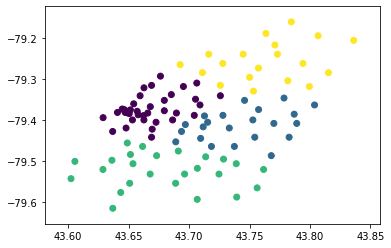

In [104]:
n_clusters = 4
kmeans = KMeans(n_clusters)
df['Cluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])
plt.scatter(df['Latitude'], df['Longitude'], c=df['Cluster']);

m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], width='50%', height='50%', zoom_start=10)
colors = ['red', 'green', 'blue', 'black']

for i, row in df.iterrows():
    c = colors[row['Cluster']]
    folium.Circle(location=[row['Latitude'], row['Longitude']], color=c, fill_color=c, fill=True, radius=200, fill_opacity=1).add_to(m)
m